In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding


In [5]:
data = pd.read_csv('Spam Detection.csv', encoding = 'ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = True, inplace = True)
data.columns = ['Labels', 'Mail']
data.head()

,Labels,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.Labels = data.Labels.replace(('ham','spam'), (0,1))
data.head()

,Labels,Mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

In [8]:
X = data.drop('Labels', axis = 1)
Y = data.Labels.values
print(X.shape)
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

(5572, 1)


In [9]:
xtest.head()

,Mail
4456,Aight should I just plan to come up later toni...
690,Was the farm open?
944,I sent my scores to sophas and i had to do sec...
3768,Was gr8 to see that message. So when r u leavi...
1189,In that case I guess I'll see you at campus lodge


In [10]:
# Tokenizer
MaxLenVocal = 20000

tokenizer = Tokenizer(num_words = MaxLenVocal)
tokenizer.fit_on_texts(xtrain.Mail)
sequences_train = tokenizer.texts_to_sequences(xtrain.Mail)
sequences_test = tokenizer.texts_to_sequences(xtest.Mail)

In [11]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("Length of the word index: ", V)


Length of the word index:  7824


In [12]:
# Padding

data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

T = data_train.shape[1]

Shape of data train tensor: (4457, 189)


In [13]:
data_test = pad_sequences(sequences_test, maxlen = T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1115, 189)


In [14]:
# Model
D = 20
M = 15
i = Input(shape = (T,))
x = Embedding(V+1,D)(i)
x = LSTM(M, return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i,x)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
r = model.fit(data_train, ytrain, epochs = 10, validation_data = (data_test, ytest))

Epoch 1/10
140/140 [==============================] - 14s 81ms/step - loss: 0.4362 - accuracy: 0.8696 - val_loss: 0.4176 - val_accuracy: 0.8511
Epoch 2/10
140/140 [==============================] - 11s 76ms/step - loss: 0.3622 - accuracy: 0.8696 - val_loss: 0.3306 - val_accuracy: 0.8511
Epoch 3/10
140/140 [==============================] - 14s 101ms/step - loss: 0.2117 - accuracy: 0.9042 - val_loss: 0.1719 - val_accuracy: 0.9641
Epoch 4/10
140/140 [==============================] - 14s 100ms/step - loss: 0.1144 - accuracy: 0.9827 - val_loss: 0.1228 - val_accuracy: 0.9677
Epoch 5/10
140/140 [==============================] - 13s 90ms/step - loss: 0.0692 - accuracy: 0.9879 - val_loss: 0.0948 - val_accuracy: 0.9758
Epoch 6/10
140/140 [==============================] - 11s 76ms/step - loss: 0.0443 - accuracy: 0.9921 - val_loss: 0.0828 - val_accuracy: 0.9776
Epoch 7/10
140/140 [==============================] - 11s 76ms/step - loss: 0.0302 - accuracy: 0.9948 - val_loss: 0.0800 - val_accurac

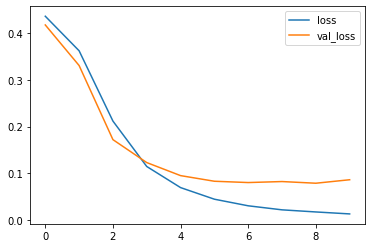

In [15]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

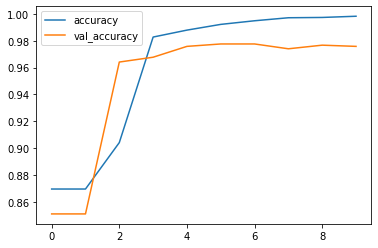

In [16]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [17]:
# CNN Model

D = 20

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
r = model.fit(data_train, ytrain, epochs = 10, validation_data = (data_test, ytest))

Epoch 1/10
140/140 [==============================] - 5s 30ms/step - loss: 0.3497 - accuracy: 0.8699 - val_loss: 0.2174 - val_accuracy: 0.9283
Epoch 2/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0706 - accuracy: 0.9791 - val_loss: 0.0906 - val_accuracy: 0.9749
Epoch 3/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0143 - accuracy: 0.9966 - val_loss: 0.0632 - val_accuracy: 0.9830
Epoch 4/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0820 - val_accuracy: 0.9821
Epoch 5/10
140/140 [==============================] - 5s 34ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0882 - val_accuracy: 0.9821
Epoch 6/10
140/140 [==============================] - 4s 29ms/step - loss: 9.1499e-04 - accuracy: 0.9998 - val_loss: 0.0958 - val_accuracy: 0.9821
Epoch 7/10
140/140 [==============================] - 4s 31ms/step - loss: 6.5540e-04 - accuracy: 0.9998 - val_loss: 0.0910 - val_accuracy

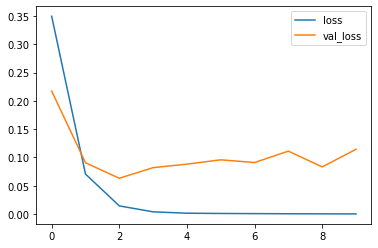

In [18]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

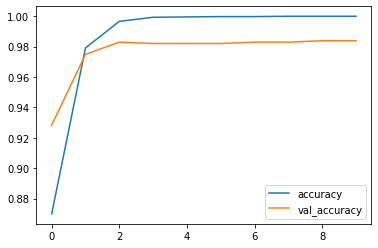

In [19]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()